<a href="https://colab.research.google.com/github/AntoniXGaudi/Data_Analysis_1/blob/main/DL_Assignment_2_(Image_Classification_with_CNN)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [8]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this message.")

You can safely ignore this message.


In [9]:
import os

# Set TF log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [10]:
import tensorflow as tf

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

CPU will be used for this session.


In [11]:
if tf.config.list_physical_devices("GPU"):
    !nvidia-smi

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [14]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [15]:
print(f"There are {len(X_train)} images in the training dataset")
print(f"There are {len(X_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


In [16]:
# Checking the shape of one image
X_train[9].shape

(28, 28)

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

np.set_printoptions(suppress=True)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [21]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

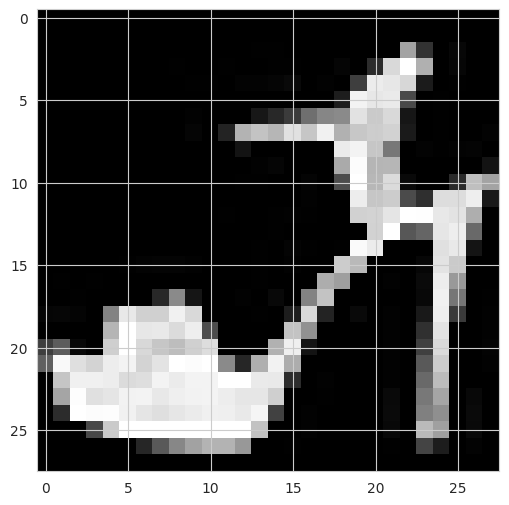

In [22]:
plt.imshow(X_train[9], cmap="gray") # | imageshow function von plt so that we can actually see the image

<Axes: >

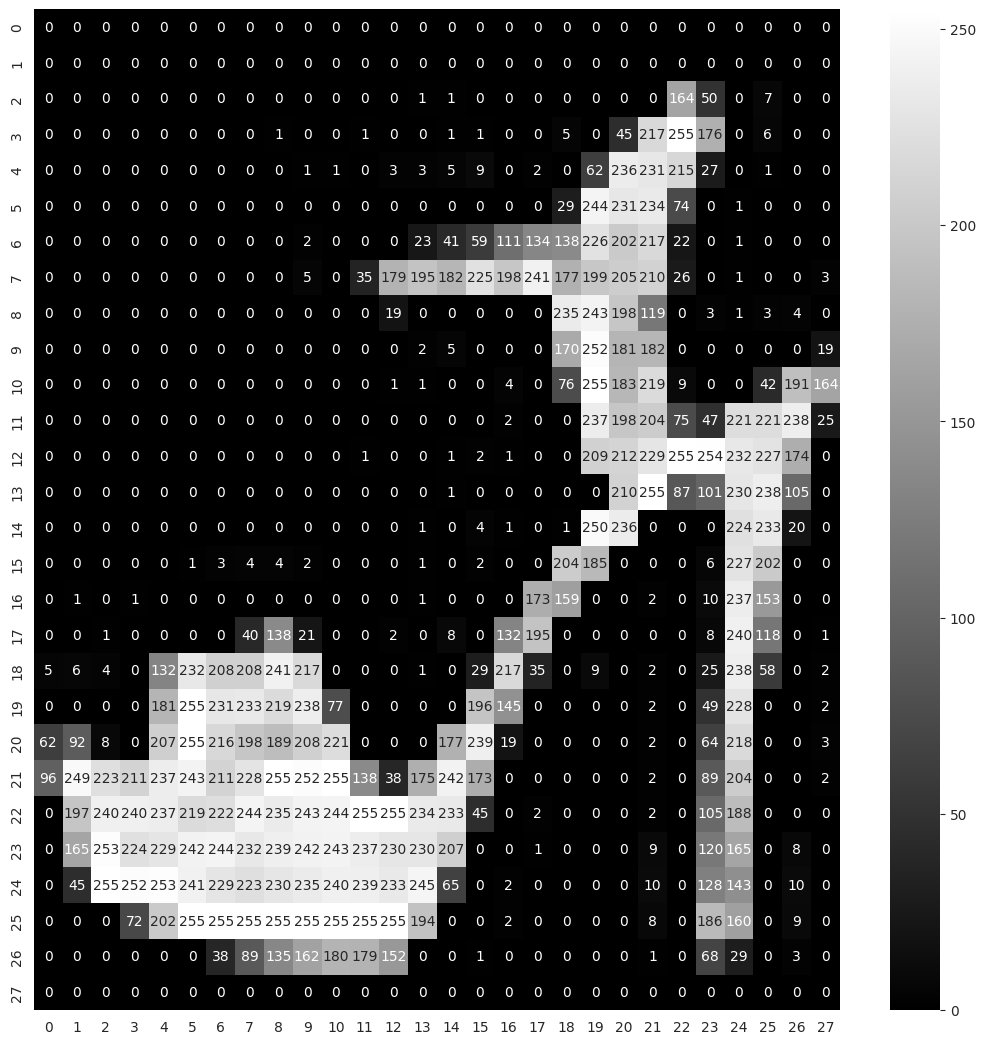

In [23]:
plt.figure(figsize=(13, 13))
sns.heatmap(X_train[9], annot=True, cmap="gray", fmt=".3g")

In [24]:
X_train[9]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   1,   0,   0,   0,   0,   0,   0,   0, 164,  50,   0,   7,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   1,   0,
          0,   1,   1,   0,   0,   5,   0,  45, 217, 255, 176,   0,   6,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   0,   3,
          3,   5,   9,   0,   2,   0,  62, 236, 231, 215,  27,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  29, 244, 231, 234,  74,   0,   1,   0,
          0,   0],
       [  

In [25]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [26]:
y_train[9]  # Sandal?

5

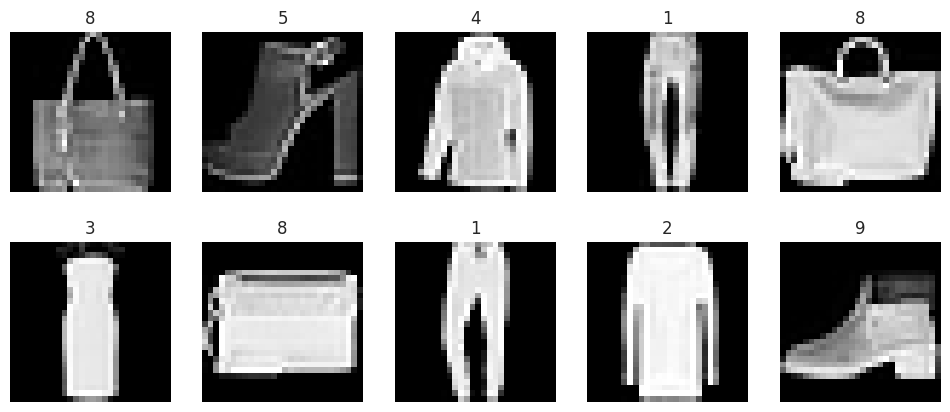

In [27]:
f, axes = plt.subplots(2, 5, figsize=(12, 5))

for ax in axes.ravel():
    idx = np.random.randint(0, len(X_train))
    ax.axis("off")
    ax.set_title(y_train[idx])
    ax.imshow(X_train[idx], cmap="gray")
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [28]:
X_train[9].min()  # between 0 and 59.999 we pick image number 9

0

In [29]:
X_train[9].max()

255

In [30]:
# | Normalize image pixels, normalizing usu enhances the performance of the model
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [31]:
X_train[9].min()

0.0

In [32]:
X_train[9].max()

1.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [33]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [34]:
np.expand_dims(X_train, 3).shape # we need to know the color channel, | expanding dimensions in order for ..to be able to work with it

(60000, 28, 28, 1)

In [35]:
X_train = np.expand_dims(X_train, 3)
X_test = np.expand_dims(X_test, 3)

In [36]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [37]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [38]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [39]:
from tensorflow.keras.utils import to_categorical

In [40]:
Y_train = to_categorical(y_train, 10)  # we have 10 classes 0 to 9  # || you're converting y_train (which contains class labels as integers from 0 to 9)
# into a "one-hot" encoded format where each label is represented as a binary vector of length 10.
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [41]:
y_train[9]

5

In [42]:
Y_train[9]  # label is 4, the fith element has 1, all the others are 0, just like one_hot_encoding, s. Skizze in DL lecture

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

##  Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [45]:
model = Sequential()

In [46]:
model.add(   # | Learning 1: convolution with the parameters
    Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu")  # |,1 for color channel, the Keras model does accept only that format. We will see examples which acutally use colr <>1 later in the course. || In most cases, we prefer relu. If you don't have any specific reason to use another one, then use "ReLu"
)  # stride = 1, padding = valid

In [47]:
model.add(MaxPool2D(pool_size=(2, 2)))  #  stride = pool size, padding = valid . # | Learning 2: pooling

In [48]:
model.add(Flatten()) # | Flattening, after business as usual with ANN

In [49]:
model.add(Dense(128, activation="relu"))

In [50]:
model.add(Dense(10, activation="softmax"))

In [51]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])  # | now we use loss="categorical_crossentropy, since it's a multi-class problem

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

In [53]:
from tensorflow.keras.callbacks import EarlyStopping  # Early stopping to prevent overfitting

In [54]:
early_stop = EarlyStopping(
    monitor="val_accuracy", mode="max", patience=4, restore_best_weights=True  #  we nuse small patience numbers in CNN, why??
)

In [57]:
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop],
)

Epoch 1/20
1875/1875 [==============================] - 55s 29ms/step - loss: 0.2981 - accuracy: 0.8924 - val_loss: 0.2926 - val_accuracy: 0.8904
Epoch 2/20
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2395 - accuracy: 0.9125 - val_loss: 0.2702 - val_accuracy: 0.9009
Epoch 3/20
1875/1875 [==============================] - 46s 24ms/step - loss: 0.2039 - accuracy: 0.9248 - val_loss: 0.2522 - val_accuracy: 0.9102
Epoch 4/20
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1756 - accuracy: 0.9351 - val_loss: 0.2453 - val_accuracy: 0.9128
Epoch 5/20
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1516 - accuracy: 0.9438 - val_loss: 0.2546 - val_accuracy: 0.9135
Epoch 6/20
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1292 - accuracy: 0.9525 - val_loss: 0.2587 - val_accuracy: 0.9169
Epoch 7/20
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1095 - accuracy: 0.9606 - val_loss: 0.2591 -

In [60]:
X_train.shape

(60000, 28, 28, 1)

In [61]:
Y_train.shape

(60000, 10)

In [62]:
model.metrics_names

['loss', 'accuracy']

In [63]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.298,0.892,0.293,0.890
1,0.240,0.912,0.270,0.901
2,0.204,0.925,0.252,0.910
3,0.176,0.935,0.245,0.913
4,0.152,0.944,0.255,0.914


**TASK 7: Plot values of metrics you used in your model.**

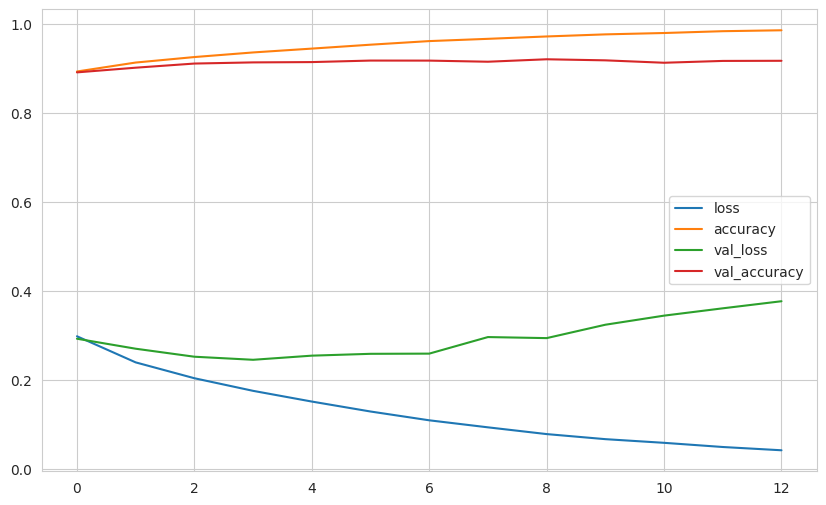

In [64]:
summary.plot();

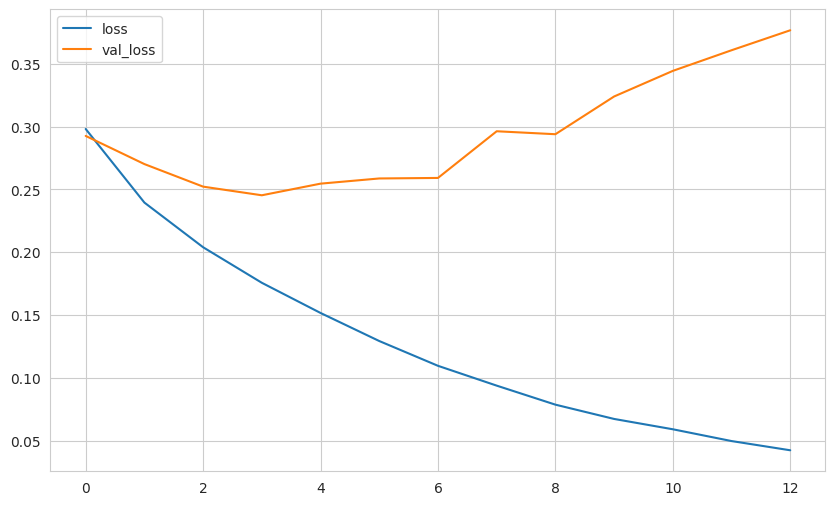

In [65]:
summary[["loss", "val_loss"]].plot();

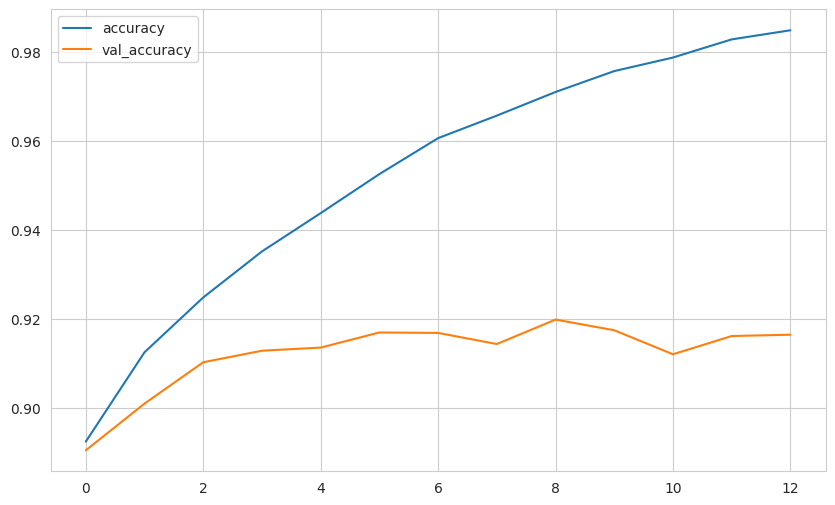

In [66]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [67]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    multilabel_confusion_matrix,
)

In [68]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2940 - accuracy: 0.9198


[0.2939700782299042, 0.9197999835014343]

In [69]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2939700782299042
Test accuracy: 0.9197999835014343


In [70]:
pred_prob = model.predict(X_test) # pred_prob are very close to 1 for the digit from 0 to 9
pred_prob

313/313 [==============================] - 2s 7ms/step


array([[0.        , 0.        , 0.00000157, ..., 0.00001617, 0.00000039,
        0.9999818 ],
       [0.00000002, 0.        , 0.99999994, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.99999994,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00000415, 0.00000331, 0.00073705, ..., 0.2032662 , 0.00008121,
        0.00054404]], dtype=float32)

In [71]:
pred_prob.shape

(10000, 10)

In [72]:
pred_prob[0] # liefert uns die one_hot_encoded Darstellung

array([0.        , 0.        , 0.00000157, 0.        , 0.        ,
       0.00000006, 0.        , 0.00001617, 0.00000039, 0.9999818 ],
      dtype=float32)

In [73]:
np.argmax(pred_prob[0])  # | The function np.argmax() returns the index of the maximum value in the array that it is applied to. This is
# where the value 1 or almost 1 will be stored

9

In [74]:
y_pred = np.argmax(pred_prob, axis=1)  # we converted vectors to numbers and can see the predictions (digits)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [75]:
y_pred.shape

(10000,)

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1000
           1       1.00      0.98      0.99      1000
           2       0.87      0.88      0.87      1000
           3       0.91      0.93      0.92      1000
           4       0.87      0.87      0.87      1000
           5       0.98      0.99      0.98      1000
           6       0.80      0.74      0.77      1000
           7       0.97      0.97      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [77]:
print(confusion_matrix(y_test, y_pred))

[[883   0  15  18   5   2  72   0   5   0]
 [  0 983   0  13   1   0   0   0   3   0]
 [ 18   0 879   7  48   0  47   0   1   0]
 [ 19   0   8 934  19   0  18   0   2   0]
 [  2   0  51  30 868   0  49   0   0   0]
 [  0   0   0   0   0 988   0   8   0   4]
 [116   0  55  24  56   0 741   0   8   0]
 [  0   0   0   0   0   9   0 973   1  17]
 [  2   1   2   5   3   3   1   2 981   0]
 [  0   0   0   0   0   6   1  25   0 968]]


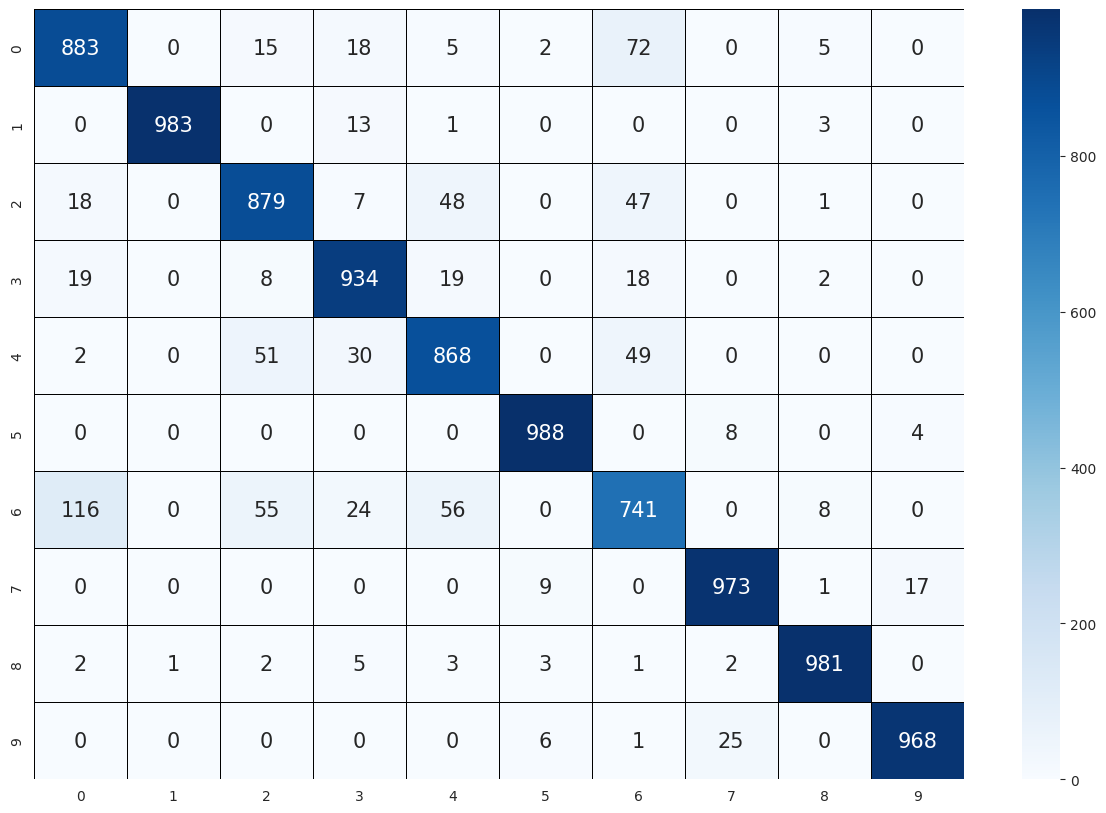

In [78]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

In [ ]:
# most confusion between T-shirt [0] and shirt/too [6]

In [79]:
# y_test != y_pred
np.not_equal(y_test, y_pred)

array([False, False, False, ..., False, False, False])

In [80]:
# (y_test != y_pred).sum()
np.not_equal(y_test, y_pred).sum() # | in 127 von 10.000 Testfällen die falsche Ziffer prognostiziert!

802

In [81]:
np.equal(y_test, y_pred).sum() # | Accuracy = 9873/10000 = 98,7%

9198

## Prediction

In [82]:
my_number = X_test[3]

In [83]:
my_number.shape

(28, 28, 1)

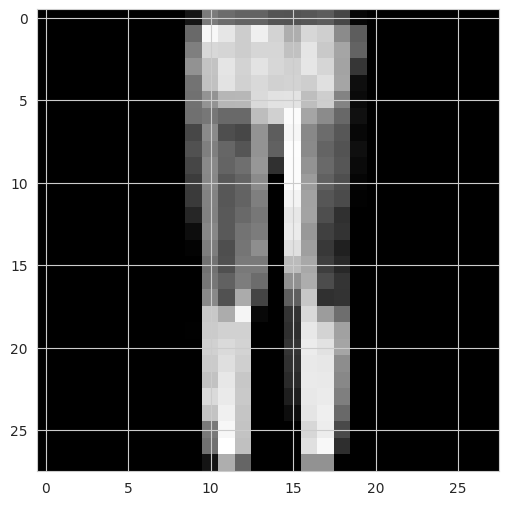

In [84]:
plt.imshow(my_number, cmap="gray")
plt.show()

In [85]:
np.expand_dims(my_number, 0).shape  # | again add 1 dim for color channel

(1, 28, 28, 1)

In [86]:
pred_prob = model.predict(np.expand_dims(my_number, 0)) # damit predict den Input richtig lesen kann, müssen wir wieder in das Format mit der 1 am Ende für die Farbe wechseln
pred_prob

1/1 [==============================] - 0s 35ms/step


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [87]:
# SHAPE --> (num_images, width, height, color_channels)
y_pred = np.argmax(pred_prob)
y_pred # 1, indeed looks like trousers

1

Saving the model

In [88]:
model.save("cnn-1.h5") # | save the model as h5 and use it again belwo

In [89]:
model = tf.keras.models.load_model("cnn-1.h5")

In [90]:
pred = model.predict(np.expand_dims(X_test[24], 0))

1/1 [==============================] - 0s 95ms/step


In [91]:
np.argmax(pred)

1

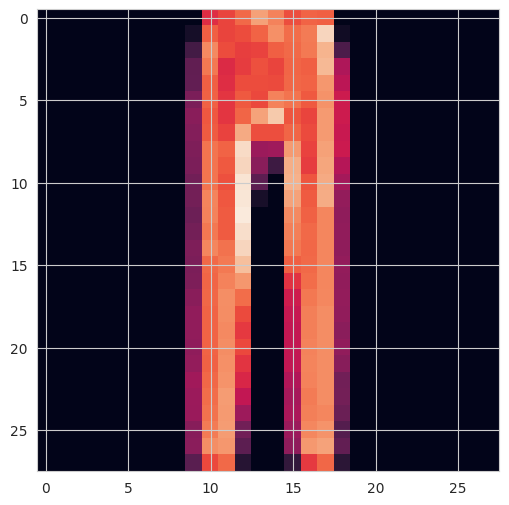

In [92]:
plt.imshow(X_test[24].reshape(28, 28))
plt.show()

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___